In [1]:
import torch


from model_architectures import MonaiDDPM
device = "cuda:0" if torch.cuda.is_available() else "cpu"


CONDITIONAL = True
RESOLUTION = 256
T = 1_000     

ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/025_MNIST_basic_DDPM/checkpoints/ddpm-epoch=08-train_loss=0.0017.ckpt" # MNIST EXAMPLE> WORKED WELL.
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/026_DDPM_revamped/checkpoints/ddpm-epoch=01-train_loss=0.3648.ckpt" # 
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/031_DDPM_classifier-free-test/checkpoints/epoch=09-step=9810.ckpt"
# ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/032_cDDPM_512x512-test-prog/checkpoints/best_64px.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/037_cDDPM_256x256/checkpoints/epoch=22-step=7843.ckpt"
# ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/041_cDDPM_128x128/checkpoints/epoch=16-step=5797.ckpt"
# ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/045_DDPM_deeper_unconditional_64x64/checkpoints/epoch=16-step=5797.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/049_cDDPM_depth5_fixedScaling_256x256/checkpoints/epoch=22-step=7843.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/053_DDPM__DataArtifactsRemoved___256x256/checkpoints/epoch=04-step=1435.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/054_DDPM_default512_256x256/checkpoints/epoch=04-step=1435.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/061_DDPM_contrast-enhanced-40percent_256x256/checkpoints/epoch=04-step=1435.ckpt"
ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/063_DDPM_contrast-aug-20percent_256x256/checkpoints/epoch=04-step=1435.ckpt"
# ckpt_path = "/home/locolinux2/U24_synthesis/lightning_synthesis/experiments/069_DDPM_contrast-aug-20percent-lrscheduler_256x256/checkpoints/epoch=04-step=1435.ckpt"

model = MonaiDDPM.load_from_checkpoint(
    ckpt_path
).to(device).eval()

Error importing huggingface_hub.file_download: 'Version'


/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/generative/networks/layers/vector_quantizer.py:86: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/generative/networks/layers/vector_quantizer.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/home/locolinux2/miniconda3/envs/U24/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:62: FutureWarning: Importing `StructuralSimilarityIndexMeasure` from `torchmetrics` was deprecated and will be removed in 2.0. Import `StructuralSimilarityIndexMeasure` from `torchmetrics.image` instead.
  _future_warning(


Initialized conditional model.


In [2]:
dd = {}
GUIDE_SCALES = [3.0] 
for gscale in GUIDE_SCALES:
    nb_images = 8
    with torch.no_grad():
        samples = model.sample(
            N=nb_images,
            label=1,
            size=RESOLUTION,
            guidance_scale=gscale
        )
    dd[str(int(gscale))]=samples
    


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [28:37<00:00,  1.72s/it]


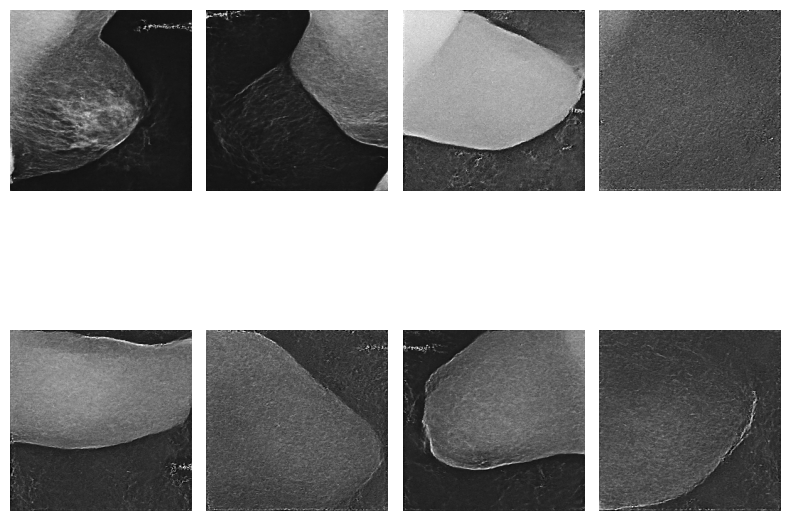

In [3]:
import matplotlib.pyplot as plt

vis_samples = dd['3']
# if CONDITIONAL:
plt.figure(figsize=(8, 8))           
for i in range(8):                   # ⟵ only 8 images
    plt.subplot(2, 4, i + 1)         # 2 × 2 grid
    plt.axis("off")
    plt.imshow(vis_samples[i, 0].cpu(), cmap="gray", vmin=0, vmax=1)
plt.tight_layout()
plt.savefig("./inference_snapshots/samples_grid.png", dpi=300)
plt.show()

# else:
#     plt.style.use("default")
#     plt.imshow(chain[0, 0].cpu(), cmap="gray", vmin=0, vmax=1)
#     plt.axis("off")
#     plt.tight_layout()

#     plt.show()
